In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Load QMNIST dataset and preprocess

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)


## Create DataLoaders

In [3]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Iterating and Visualizing the train and test Datasets

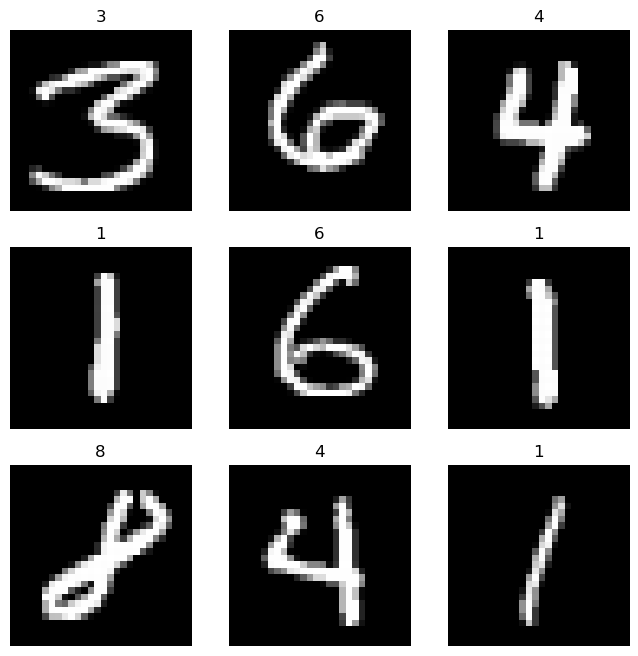

In [4]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

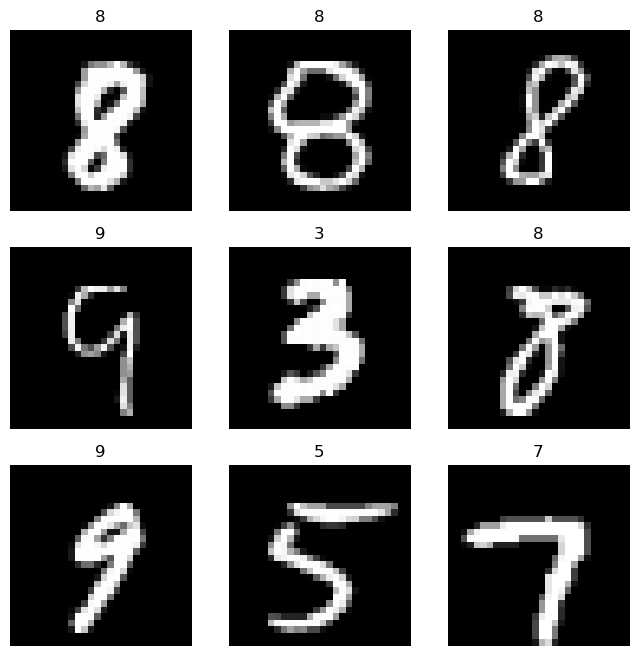

In [5]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Define the neural network architecture

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model1 = MLP()

## Define the loss function and optimizer

In [7]:
def training(model,train_loader, criterion, optimizer, convert=False):

    # Train the neural network
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            if convert==True:
                labels = labels.long()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
    print('Finished Training')

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
training(model1,train_loader,criterion,optimizer)

Epoch 1, Batch 100, Loss: 1.061816994547844
Epoch 1, Batch 200, Loss: 0.4360473258793354
Epoch 1, Batch 300, Loss: 0.40424714103341103
Epoch 1, Batch 400, Loss: 0.38280183404684065
Epoch 1, Batch 500, Loss: 0.30820600330829623
Epoch 1, Batch 600, Loss: 0.2991146632283926
Epoch 1, Batch 700, Loss: 0.3061607118695974
Epoch 1, Batch 800, Loss: 0.26715439192950724
Epoch 1, Batch 900, Loss: 0.2737673832476139
Epoch 2, Batch 100, Loss: 0.23594975218176842
Epoch 2, Batch 200, Loss: 0.22049896776676178
Epoch 2, Batch 300, Loss: 0.1970886568725109
Epoch 2, Batch 400, Loss: 0.19497104302048684
Epoch 2, Batch 500, Loss: 0.1936086367815733
Epoch 2, Batch 600, Loss: 0.17917533215135337
Epoch 2, Batch 700, Loss: 0.18168642316013575
Epoch 2, Batch 800, Loss: 0.16888135217130185
Epoch 2, Batch 900, Loss: 0.17630338279530405
Epoch 3, Batch 100, Loss: 0.1398440705612302
Epoch 3, Batch 200, Loss: 0.14289604788646101
Epoch 3, Batch 300, Loss: 0.1478538844548166
Epoch 3, Batch 400, Loss: 0.1402255231142044

## Evaluate the model with training dataset

In [9]:
def evalModelwithTrain(model,train_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    result = 100 * (correct / total)
    print(f'Accuracy with training dataset: {result}%')
    return result


## Evaluate the model with test dataset and store predictions

In [10]:
predictions = []
flabels = []
fimages = []
def evalModelwithTest(model,train_loader):
    model.eval()
    correct = 0
    total = 0
    global predictions, flabels, fimages
    predictions = []
    flabels = []
    fimages = []
    with torch.no_grad():
        for data in test_loader:
            timages, tlabels = data
            outputs = model(timages)
            _, predicted = torch.max(outputs.data, 1)
            predNumpy = predicted.numpy();
            predictions.extend(predNumpy)  # Store predictions
            flabels.extend(tlabels.numpy())
            fimages.extend(timages)
            total += tlabels.size(0)
            correct += (predicted == tlabels).sum().item()
    result = 100 * (correct / total)
    print(f'Accuracy with test dataset: {result}%')
    return result


# Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [11]:
evalModelwithTrain(model1,train_loader)
evalModelwithTest(model1,train_loader)

Accuracy with training dataset: 97.605%
Accuracy with test dataset: 96.42666666666668%


96.42666666666668

torch.Size([1, 28, 28])


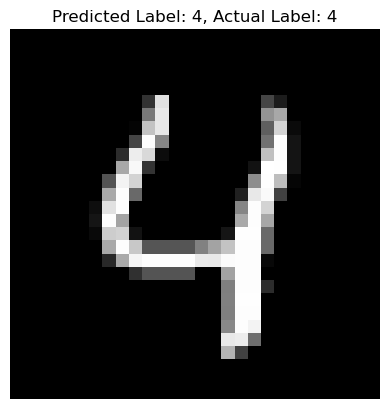

In [12]:
# Get one test image and its label

testIndex = 4

timage, tlabel = fimages[testIndex], flabels[testIndex]
print(timage.shape)
# Reshape the image tensor to a 28x28 shape
timage = timage.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = timage.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[testIndex].item()}, Actual Label: {tlabel.item()}')
plt.axis('off')
plt.show()


# Step 4. Increase the current number of nodes in the layer to 256

### Hypothesis: Performance of the model increases with increase in number of nodes in the layer to 256.

# Step 5. Modify the model based on the chosen method and train

In [13]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model2 = MLP()

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)
training(model2,train_loader,criterion,optimizer)

Epoch 1, Batch 100, Loss: 0.8985725602507592
Epoch 1, Batch 200, Loss: 0.40871361643075943
Epoch 1, Batch 300, Loss: 0.33459182471036913
Epoch 1, Batch 400, Loss: 0.3114462473988533
Epoch 1, Batch 500, Loss: 0.2774693172425032
Epoch 1, Batch 600, Loss: 0.22221440993249417
Epoch 1, Batch 700, Loss: 0.22256406173110008
Epoch 1, Batch 800, Loss: 0.23086966313421725
Epoch 1, Batch 900, Loss: 0.19748420249670745
Epoch 2, Batch 100, Loss: 0.17127276256680488
Epoch 2, Batch 200, Loss: 0.15057542975991964
Epoch 2, Batch 300, Loss: 0.17812605516985058
Epoch 2, Batch 400, Loss: 0.1503095829859376
Epoch 2, Batch 500, Loss: 0.14715852899476886
Epoch 2, Batch 600, Loss: 0.15627979036420583
Epoch 2, Batch 700, Loss: 0.15206062028184533
Epoch 2, Batch 800, Loss: 0.14678342172876
Epoch 2, Batch 900, Loss: 0.13088338812813163
Epoch 3, Batch 100, Loss: 0.10776589822024107
Epoch 3, Batch 200, Loss: 0.11611794227734208
Epoch 3, Batch 300, Loss: 0.11744940891861916
Epoch 3, Batch 400, Loss: 0.1118609447963

# Step 6. Report the Results of the modified model.

In [15]:
evalModelwithTrain(model2,train_loader)
evalModelwithTest(model2,train_loader)

Accuracy with training dataset: 97.38333333333333%
Accuracy with test dataset: 96.17166666666667%


96.17166666666667

In [16]:
print("Performance of the model improved which is shown in both Training and Test datasets!")

Performance of the model improved which is shown in both Training and Test datasets!


# Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [17]:
## Different optimizers, activation and  loss functions
import torch.nn.functional as F

# Modify your model's forward function
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)  # Applied log-softmax
        return x
model3 = MLP();

In [18]:
criterion = nn.NLLLoss() # Negative Log-Likelihood Loss Function 
optimizer = optim.SGD(model3.parameters(), lr=0.001) # stochastic gradient descent with momentum
training(model3,train_loader,criterion,optimizer,True)

Epoch 1, Batch 100, Loss: 2.3002550625801086
Epoch 1, Batch 200, Loss: 2.283585636615753
Epoch 1, Batch 300, Loss: 2.267919034957886
Epoch 1, Batch 400, Loss: 2.252979781627655
Epoch 1, Batch 500, Loss: 2.2351708126068117
Epoch 1, Batch 600, Loss: 2.213322069644928
Epoch 1, Batch 700, Loss: 2.194905364513397
Epoch 1, Batch 800, Loss: 2.171711735725403
Epoch 1, Batch 900, Loss: 2.148003165721893
Epoch 2, Batch 100, Loss: 2.112252399921417
Epoch 2, Batch 200, Loss: 2.081825394630432
Epoch 2, Batch 300, Loss: 2.0489038383960723
Epoch 2, Batch 400, Loss: 2.017187865972519
Epoch 2, Batch 500, Loss: 1.9783679044246674
Epoch 2, Batch 600, Loss: 1.933749715089798
Epoch 2, Batch 700, Loss: 1.8937742340564727
Epoch 2, Batch 800, Loss: 1.8490628969669343
Epoch 2, Batch 900, Loss: 1.795780245065689
Epoch 3, Batch 100, Loss: 1.727423769235611
Epoch 3, Batch 200, Loss: 1.6611605608463287
Epoch 3, Batch 300, Loss: 1.6213914966583252
Epoch 3, Batch 400, Loss: 1.560092604160309
Epoch 3, Batch 500, Loss

In [19]:
evalModelwithTrain(model3,train_loader)
evalModelwithTest(model3,train_loader)

Accuracy with training dataset: 83.83166666666668%
Accuracy with test dataset: 83.82333333333334%


83.82333333333334

In [20]:
print("The performance of the model is reduced using NLL loss function applied with log-softmax, SGD optimizer")  

The performance of the model is reduced using NLL loss function applied with log-softmax, SGD optimizer


In [21]:
class TunedMLP(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(TunedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

def training(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.long()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
    print('Finished Training')


In [ ]:
import pandas as pd

# Hyperparameters
learning_rate = 0.001
dropout_rate = 0.5
num_epochs = 5

# List of optimizers, loss functions, and activation functions
optimizers = [optim.SGD, optim.Adam, optim.RMSprop]
loss_functions = [nn.CrossEntropyLoss, nn.NLLLoss]
activation_functions = [F.relu, F.leaky_relu, F.elu]

# Store results in a list
results = []

# Experiment with different combinations
for opt_class in optimizers:
    for loss_class in loss_functions:
        for activation_func in activation_functions:
            model = TunedMLP(dropout_rate=dropout_rate)
            optimizer = opt_class(model.parameters(), lr=learning_rate)
            criterion = loss_class()
            
            # Set the activation function in the model
            model.fc1.activation = activation_func
            model.fc2.activation = activation_func

            print(f"\nExperimenting with Optimizer: {opt_class.__name__}, Loss: {loss_class.__name__}, Activation: {activation_func.__name__}\n")
            
            training(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

            # Evaluate on training set
            train_accuracy = evalModelwithTrain(model, train_loader)

            # Evaluate on test set (assuming evalModelwithTest returns accuracy)
            test_accuracy = evalModelwithTest(model, test_loader)

            # Store the results
            result_entry = {
                'Optimizer': opt_class.__name__,
                'Loss Function': loss_class.__name__,
                'Activation Function': activation_func.__name__,
                'Learning Rate': learning_rate,
                'Dropout Rate': dropout_rate,
                'Train Accuracy': train_accuracy,
                'Test Accuracy': test_accuracy
            }
            results.append(result_entry)

# Convert the list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)
            


Experimenting with Optimizer: SGD, Loss: CrossEntropyLoss, Activation: relu

Epoch 1, Batch 100, Loss: 2.294035427570343
Epoch 1, Batch 200, Loss: 2.277443838119507
Epoch 1, Batch 300, Loss: 2.2582648015022277
Epoch 1, Batch 400, Loss: 2.2418451571464537
Epoch 1, Batch 500, Loss: 2.2221875262260435
Epoch 1, Batch 600, Loss: 2.205084590911865
Epoch 1, Batch 700, Loss: 2.1834514689445497
Epoch 1, Batch 800, Loss: 2.1586793088912963
Epoch 1, Batch 900, Loss: 2.1398246002197268
Epoch 2, Batch 100, Loss: 2.1006210374832155
Epoch 2, Batch 200, Loss: 2.0694668805599212
Epoch 2, Batch 300, Loss: 2.040208467245102
Epoch 2, Batch 400, Loss: 2.012355298995972
Epoch 2, Batch 500, Loss: 1.981854375600815
Epoch 2, Batch 600, Loss: 1.9525963973999023
Epoch 2, Batch 700, Loss: 1.914734605550766
Epoch 2, Batch 800, Loss: 1.8833457052707672
Epoch 2, Batch 900, Loss: 1.8483332681655884
Epoch 3, Batch 100, Loss: 1.785906856060028
Epoch 3, Batch 200, Loss: 1.7573161673545838
Epoch 3, Batch 300, Loss: 1.71

# Observations from the results of the models 

1. The model trained with the Adam optimizer outperforms the one trained with SGD across different activation functions and loss functions.

2. Among the tested activation functions (ReLU, Leaky ReLU, ELU), ReLU tends to perform the best, achieving the highest accuracy with both optimizers and loss functions.

3. Adam achieves higher accuracy on both training and test datasets.

4. CrossEntropyLoss outperforms NLLLoss, achieving higher accuracies on both training and test datasets.

5. Across different experiments, the training loss consistently decreases over epochs, indicating that the models are learning and adapting to the training data